In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from utils import *

%load_ext autoreload
%autoreload 0.5

# Task 4 Part 2
The Lorenz attractor is a dynamical system in continuous time with smooth evolution operators that produce chaotic dynamics when the dimension of the state space is larger than 2. The system can be defined as
\begin{align*}
    \dot{X} &= -\sigma X + \sigma Y,\\
    \dot{Y} &= -XZ+\rho X-Y,\\
    \dot{Z} &= XY-\beta Z
\end{align*}
in which $X, Y, Z$ denotes the 3-dimensional coordinates of the system, dot denotes the derivative with respect to the dimensionless time, while $\sigma, \rho, \beta$ are the system parameters.

In [2]:
def lorenz(x, y, z, s=10, b=8/3, r=28):
    ''' 
    Definition of the derivative equation for the lorenz system.
    :param x, y, z: float
        current system value
    :param s, b, r: float
        lorenz model parameters
    :returns: float
        derivative result of x, y, z
    '''
    dx = s*(y - x)
    dy = r*x - y - x*z
    dz = x*y - b*z
    return dx, dy, dz

def visualize(Tend, x0, y0, z0, s, b, r):   
    '''
    Calculate and plot the 3D trajectory of the Lorenz model from the initial state x_0=(x0, y0, z0), 
    and parameters sigma=s, beta=b, rho=r, simulating within range of time from 0 to Tend.

    :param Tend: int
        Termination time of the simulation 
    :param x0, y0, z0: float
        initial state value
    :param s, b, r: float
        lorenz model parameters
    :returns: none
    '''
    # Define the time step size and number of iterations
    dt = 0.01
    num_iterations = int(Tend / dt)

    # Set up the arrays to store the values of x, y, and z
    x = np.empty(num_iterations + 1,)
    y = np.empty(num_iterations + 1,)
    z = np.empty(num_iterations + 1,)

    # Set the initial values of x, y, and z
    x[0], y[0], z[0] = (x0, y0, z0)
    # Iterate over the time steps and update the values of x, y, and z using the Lorenz system equations
    for i in range(num_iterations):
        dx, dy, dz = lorenz(x[i], y[i], z[i], s, b, r)
        if (dx>1e8 or dy>1e8 or dz>1e8):
            break
        x[i + 1] = x[i] + dx * dt
        y[i + 1] = y[i] + dy * dt
        z[i + 1] = z[i] + dz * dt

    # Set up the 3D plot and draw the trajectory of the Lorenz system
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x[:i], y[:i], z[:i], lw=min(0.8, 80/Tend))
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    plt.show()

interact(visualize, Tend=widgets.IntSlider(min=1, max=1000, value=200),
                    x0=widgets.FloatSlider(min=0, max=20, step=0.1, value=10),
                    y0=widgets.FloatSlider(min=0, max=20, step=0.1, value=10),
                    z0=widgets.FloatSlider(min=0, max=20, step=0.1, value=10),
                    s =widgets.FloatSlider(min=0, max=20, step=0.1, value=10),
                    b =widgets.FloatSlider(min=0, max=5, step=1/15, value=8/3),
                    r =widgets.FloatSlider(min=0, max=40, step=0.01, value=28))

interactive(children=(IntSlider(value=200, description='Tend', max=1000, min=1), FloatSlider(value=10.0, descr…

<function __main__.visualize(Tend, x0, y0, z0, s, b, r)>

In [21]:
def compare(Tend=1000, x0=10, y0=10, z0=10, s=10, b=8/3, r=28):    
    '''
    Calculate and plot the 3D trajectory of the Lorenz model from two initial states
        x_0=(x0, y0, z0), x_hat_0=(x0+1e-8, y0, z0)
    and parameters sigma=s, beta=b, rho=r, simulating within range of time from 0 to Tend.
    Plot both trajectories, with another graph for the difference between two trajectories over time.

    :param Tend: int
        Termination time of the simulation 
    :param x0, y0, z0: float
        initial state value
    :param s, b, r: float
        lorenz model parameters
    :returns: none
    '''
    # Define the time step size and number of iterations
    dt = 0.01
    num_iterations = int(Tend / dt)

    # Set up the arrays to store the values of x, y, and z
    x = np.empty(num_iterations + 1,)
    y = np.empty(num_iterations + 1,)
    z = np.empty(num_iterations + 1,)
    x_hat = np.empty(num_iterations + 1,)
    y_hat = np.empty(num_iterations + 1,)
    z_hat = np.empty(num_iterations + 1,)

    # Set the initial values of x, y, and z
    x[0], y[0], z[0] = (x0, y0, z0)
    x_hat[0], y_hat[0], z_hat[0] = (x0+(1e-8), y0, z0)

    # Iterate over the time steps and update the values of x, y, and z using the Lorenz system equations
    for i in range(num_iterations):
        dx, dy, dz = lorenz(x[i], y[i], z[i], s, b, r)
        dx_hat, dy_hat, dz_hat = lorenz(x_hat[i], y_hat[i], z_hat[i], s, b, r)
        if (dx>1e18 or dy>1e18 or dz>1e18 or dx_hat>1e18 or dy_hat>1e18 or dz_hat>1e18):
            break
        x[i + 1] = x[i] + dx * dt
        y[i + 1] = y[i] + dy * dt
        z[i + 1] = z[i] + dz * dt
        x_hat[i + 1] = x_hat[i] + dx_hat * dt
        y_hat[i + 1] = y_hat[i] + dy_hat * dt
        z_hat[i + 1] = z_hat[i] + dz_hat * dt
    
    distance = np.sqrt((x - x_hat)**2 + (y - y_hat)**2 + (z - z_hat)**2)

    # Set up the 3D plot and draw the trajectory of the Lorenz system
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot(x[:i], y[:i], z[:i], color='blue', lw=min(0.5, 50/Tend))
    ax1.plot(x_hat[:i], y_hat[:i], z_hat[:i], color='red', lw=min(0.5, 50/Tend))
    ax1.set_xlabel("X Axis")
    ax1.set_ylabel("Y Axis")
    ax1.set_zlabel("Z Axis")
    
    # Plot the distance between the coordinates and the fixed point in the second subplot
    ax2 = fig.add_subplot(122)
    ax2.plot(distance, lw=0.5)
    ax2.set_xlabel("Time Step")
    ax2.set_ylabel("Distance")
    ax2.set_xlim(xmin=0, xmax=i)
    
    plt.show()

interact(compare, Tend=widgets.IntSlider(min=1, max=1000, value=25),
                  x0=widgets.FloatSlider(min=0, max=20, step=0.1, value=10),
                  y0=widgets.FloatSlider(min=0, max=20, step=0.1, value=10),
                  z0=widgets.FloatSlider(min=0, max=20, step=0.1, value=10),
                  s =widgets.FloatSlider(min=0, max=20, step=0.1, value=10),
                  b =widgets.FloatSlider(min=0, max=5, step=1/15, value=8/3),
                  r =widgets.FloatSlider(min=0, max=40, step=0.01, value=28))

interactive(children=(IntSlider(value=25, description='Tend', max=1000, min=1), FloatSlider(value=10.0, descri…

<function __main__.compare(Tend=1000, x0=10, y0=10, z0=10, s=10, b=2.6666666666666665, r=28)>

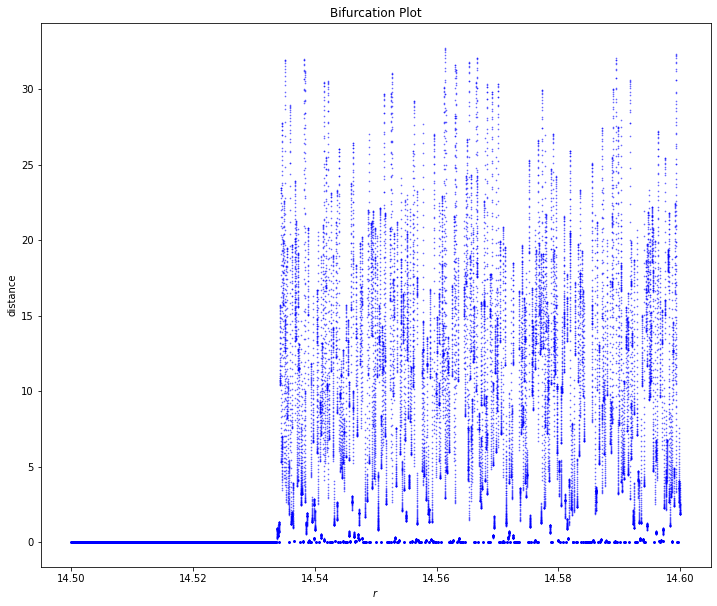

In [39]:
def bifurc_r(Tend=50, x0=10, y0=10, z0=10, s=10, b=8/3):
    '''
    Plot the bifurcation diagram of distance for taking different value of r.
    '''
    def distance(Tend, x0, y0, z0, s, b, r, tail):
        '''
        :param tail: the number of calculated distances at the end to be keep in the record
        '''
        # Define the time step size and number of iterations
        dt = 0.01
        num_iterations = int(Tend / dt)

        # Set up the arrays to store the values of x, y, and z
        x = np.empty(num_iterations + 1,)
        y = np.empty(num_iterations + 1,)
        z = np.empty(num_iterations + 1,)
        x_hat = np.empty(num_iterations + 1,)
        y_hat = np.empty(num_iterations + 1,)
        z_hat = np.empty(num_iterations + 1,)

        # Set the initial values of x, y, and z
        x[0], y[0], z[0] = (x0, y0, z0)
        x_hat[0], y_hat[0], z_hat[0] = (x0+(1e-8), y0, z0)

        # Iterate over the time steps and update the values of x, y, and z using the Lorenz system equations
        for i in range(num_iterations):
            dx, dy, dz = lorenz(x[i], y[i], z[i], s, b, r)
            dx_hat, dy_hat, dz_hat = lorenz(x_hat[i], y_hat[i], z_hat[i], s, b, r)
            if (dx>1e18 or dy>1e18 or dz>1e18 or dx_hat>1e18 or dy_hat>1e18 or dz_hat>1e18):
                break
            x[i + 1] = x[i] + dx * dt
            y[i + 1] = y[i] + dy * dt
            z[i + 1] = z[i] + dz * dt
            x_hat[i + 1] = x_hat[i] + dx_hat * dt
            y_hat[i + 1] = y_hat[i] + dy_hat * dt
            z_hat[i + 1] = z_hat[i] + dz_hat * dt
        
        distance = np.sqrt((x - x_hat)**2 + (y - y_hat)**2 + (z - z_hat)**2)
        return distance[i-tail:]
    
    r_vals = np.linspace(14.5, 14.6, 800)
    bifurc_coords_r = []
    bifurc_coords_d = []

    for r in r_vals:
        distance_list = distance(Tend, x0, y0, z0, s, b, r, tail=50)
        bifurc_coords_d = np.concatenate([bifurc_coords_d, distance_list], axis=0)
        bifurc_coords_r = np.concatenate([bifurc_coords_r, np.repeat(r, len(distance_list))], axis=0)
    
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)

    bifurcation_all = ax.scatter(bifurc_coords_r, bifurc_coords_d, s=0.5, color='blue', alpha=0.5)
    ax.set_title("Bifurcation Plot")
    ax.set_xlabel(r'$r$')
    ax.set_ylabel('distance')    
    
bifurc_r()